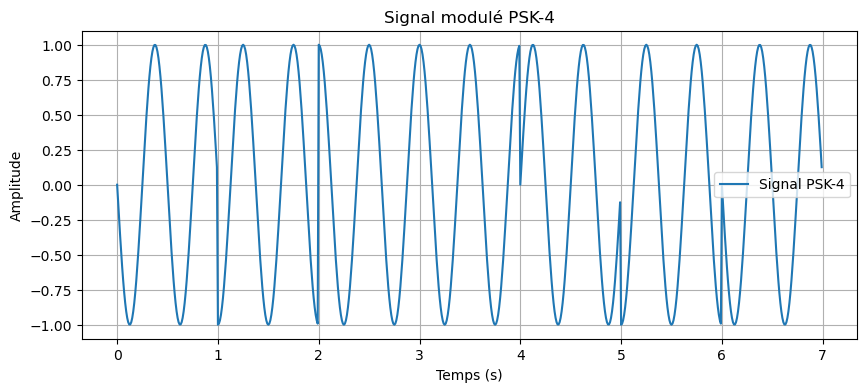

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = 1           # Amplitude du signal
fc = 2          # Fréquence porteuse (en Hz)
fs = 100        # Fréquence d'échantillonnage (Hz)
T_symbol = 1    # Durée d'un symbole (en secondes)

sequence = "01100000111001"
mapping = {
    "00": 0,
    "01": np.pi / 2,
    "10": np.pi,
    "11": 3 * np.pi / 2
}

# Découper la séquence en symboles de 2 bits
symbols = [sequence[i:i+2] for i in range(0, len(sequence), 2)]
phases = [mapping[s] for s in symbols]

# Générer le signal modulé
t = np.arange(0, len(symbols) * T_symbol, 1/fs)  # Axe temporel
signal = np.zeros_like(t)

for i, phi in enumerate(phases):
    t_symbol = (t >= i * T_symbol) & (t < (i + 1) * T_symbol)
    signal[t_symbol] = A * np.cos(2 * np.pi * fc * t[t_symbol] + phi)

# Tracé du signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label="Signal PSK-4")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("Signal modulé PSK-4")
plt.grid()
plt.legend()
plt.show()


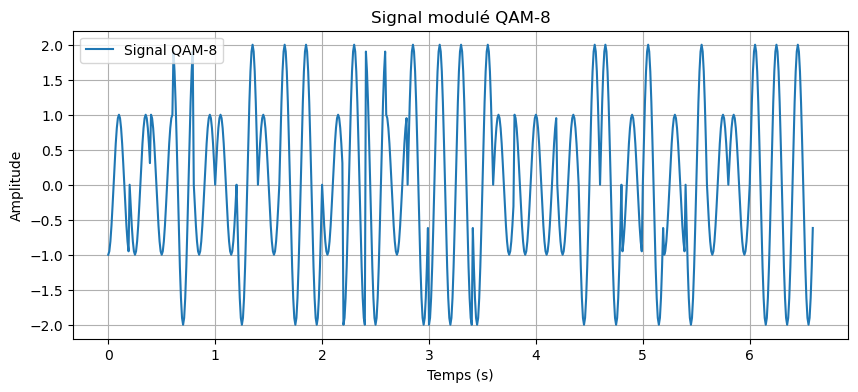

In [4]:
np.random.seed(42)  
nb_bits = 100
fc = 5              # Fréquence porteuse (Hz)
fs = 100            # Fréquence d'échantillonnage (Hz)
T_symbol = 1 / fc   # Durée d'un symbole (secondes)

sequence = np.random.randint(0, 2, nb_bits)

# Regrouper les bits en triplets pour QAM-8
symbols = [sequence[i:i+3] for i in range(0, len(sequence) - 2, 3)]

qam8_map = {
    (0,0,0): (1, 0),     
    (0,0,1): (1, np.pi/2),
    (0,1,0): (1, np.pi),  
    (0,1,1): (1, 3*np.pi/2),
    (1,0,0): (2, 0),      
    (1,0,1): (2, np.pi/2), 
    (1,1,0): (2, np.pi),   
    (1,1,1): (2, 3*np.pi/2) 
}

qam_symbols = np.array([qam8_map[tuple(s)] for s in symbols])

t = np.arange(0, len(qam_symbols) * T_symbol, 1/fs)  # Axe temporel
signal = np.zeros_like(t)

for i, (A, phi) in enumerate(qam_symbols):
    t_symbol = (t >= i * T_symbol) & (t < (i + 1) * T_symbol)
    signal[t_symbol] = A * np.cos(2 * np.pi * fc * t[t_symbol] + phi)

plt.figure(figsize=(10, 4))
plt.plot(t, signal, label="Signal QAM-8")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("Signal modulé QAM-8")
plt.grid()
plt.legend()
plt.show()
